**LẤY DỮ LIỆU CHỨNG KHOÁN**

***Nguồn dữ liệu***
Hiện tại tôi đang sử dụng một số Crawler (được viết sẵn và cho chạy tự động) để thu thập dữ liệu trên máy chủ và lưu vào cơ sở dữ liệu, sau đó tôi xây dựng các API để cho phép chương trình của mình tương tác với dữ liệu đã thu thập được để sử dụng cho các chương trình sau này.

***CÁC HÀM SỬ DỤNG***



In [18]:
# # -*- coding: utf-8 -*- 
# from xml.dom.minidom import TypeInfo
# from bs4 import BeautifulSoup
# from PIL import Image
# import os.path
# import requests
# from requests.exceptions import HTTPError
# import numpy as np
# import pandas as pd
# import json
# from urllib.request import urlopen
# import math
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# import matplotlib.pyplot as plt  

# def GetStockDataFromAPI(symbol):        
#         url = "https://stock.kdtv4.vn/api/app/company/by-stock-code?stockCode=" + symbol.upper()
#         ssl._create_default_https_context = ssl._create_unverified_context
        
#         response = urlopen(url)
        
#         data_json = json.loads(response.read())
#         #print(data_json)
#         df = pd.json_normalize(data_json['companyStocks'])
#         df = df[['stockCode','giaTriTangGiam','phanTramTangGiam','dongCua','khoiLuong','moCua','caoNhat','thapNhat','giaoDichThoaThuan','nuocNgoaiMua','nuocNgoaiBan','postedDate']]        
       
#         df['Date'] = pd.to_datetime(df['postedDate']).dt.date#,format='%Y%m%d', errors='coerce').dt.strftime('%m/%d')#.dt.date
#         df = df.sort_values(['Date'], ascending=False)
#         del df['postedDate']

#         df['Stock'] = df['stockCode']
#         del df['stockCode']

#         df['+/-'] = df['giaTriTangGiam']
#         del df['giaTriTangGiam']

#         df['%'] = df['phanTramTangGiam']
#         del df['phanTramTangGiam']

#         df['Close'] = df['dongCua']
#         del df['dongCua']

#         df['Volume'] = df['khoiLuong']
#         del df['khoiLuong']

#         df['Open'] = df['moCua']
#         del df['moCua']

#         df['High'] = df['caoNhat']
#         del df['caoNhat']

#         df['Low'] = df['thapNhat']
#         del df['thapNhat']

#         df['NN Mua'] = df['nuocNgoaiMua']
#         del df['nuocNgoaiMua']

#         df['NN Ban'] = df['nuocNgoaiBan']
#         del df['nuocNgoaiBan']

#         df['TT'] = df['giaoDichThoaThuan']
#         del df['giaoDichThoaThuan']

#         #STEP 2: MỞ RỘNG DỮ LIỆU
#         df['Money'] = (df['Close']*df['Volume']*1000*100)/1000000000 #Giá trị giao dịch (tỷ)
#         df['NN'] = df['NN Mua'] - df['NN Ban']
#         df['M(NN)'] = df['NN']*df['Volume']*1000*100/1000000000 #Giá trị giao dịch của khối ngoại (tỷ)

#         df = df.drop_duplicates(subset=['Date'])
        
        
#         #Làm sạch dữ liệu và đánh số lại
#         df = pd.DataFrame(data=df)
#         df = df.reset_index(drop=True)
        
#         return df

In [1]:
import db
import seaborn as sn
symbol = "VND"
df = db.GetStockData(symbol=symbol)
df.head()

,Date,Stock,+/-,%,Close,Volume,Open,High,Low,NN Mua,NN Ban,GDTT,Money,NN,M(NN)
0,2022-08-05,VND,0.80,3.77,22.00,28980600.0,21.00,22.35,20.90,842200.0,11500.0,0.0,63757.3200,830700.0,2.407418e+09
1,2022-08-04,VND,0.05,0.24,21.20,29973600.0,21.40,21.60,20.85,2286200.0,1729900.0,0.0,63544.0320,556300.0,1.667431e+09
2,2022-08-03,VND,0.40,1.93,21.15,26534700.0,20.50,21.20,20.45,1437400.0,958600.0,810100.0,56120.8905,478800.0,1.270481e+09
3,2022-08-02,VND,0.35,1.72,20.75,31411800.0,20.50,21.30,20.45,793200.0,164600.0,0.0,65179.4850,628600.0,1.974546e+09
4,2022-08-01,VND,1.30,6.81,20.40,42530300.0,19.25,20.40,19.20,1327100.0,997300.0,0.0,86761.8120,329800.0,1.402649e+09


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    402 non-null    object 
 1   Stock   402 non-null    object 
 2   +/-     402 non-null    float64
 3   %       402 non-null    float64
 4   Close   402 non-null    float64
 5   Volume  402 non-null    float64
 6   Open    402 non-null    float64
 7   High    402 non-null    float64
 8   Low     402 non-null    float64
 9   NN Mua  402 non-null    float64
 10  NN Ban  402 non-null    float64
 11  GDTT    402 non-null    float64
 12  Money   402 non-null    float64
 13  NN      402 non-null    float64
 14  M(NN)   402 non-null    float64
dtypes: float64(13), object(2)
memory usage: 47.2+ KB


**KIỂM TRA VÀ ĐÁNH GIÁ DỮ LIỆU**
Câu hỏi đặt ra:
(1) Dữ liệu có bao nhiêu dòng ?
(2) Dữ liệu đã được sắp xếp theo đúng thứ tự chưa ?
(3) Dữ liệu có bị lỗi không ?
(4) Dữ liệu đã được làm sạch chưa ?

**TRỰC QUAN HÓA DỮ LIỆU**
Xét dữ liệu trong khoảng T thời gian

In [3]:
from datetime import datetime
from datetime import datetime, timedelta
    
#d = datetime.today() - timedelta(days=days_to_subtract)

start = datetime.today() - timedelta(days=30)
end = datetime.today() - timedelta(days=1)

print(start)
print(end)
df = df[0:100]


2022-07-06 22:10:27.690919
2022-08-04 22:10:27.690937


**TIME SERIES**

In [25]:
#ts = df.set_index('Date')

**VẼ ĐỒ THỊ GIÁ**

TypeError: 'module' object is not callable

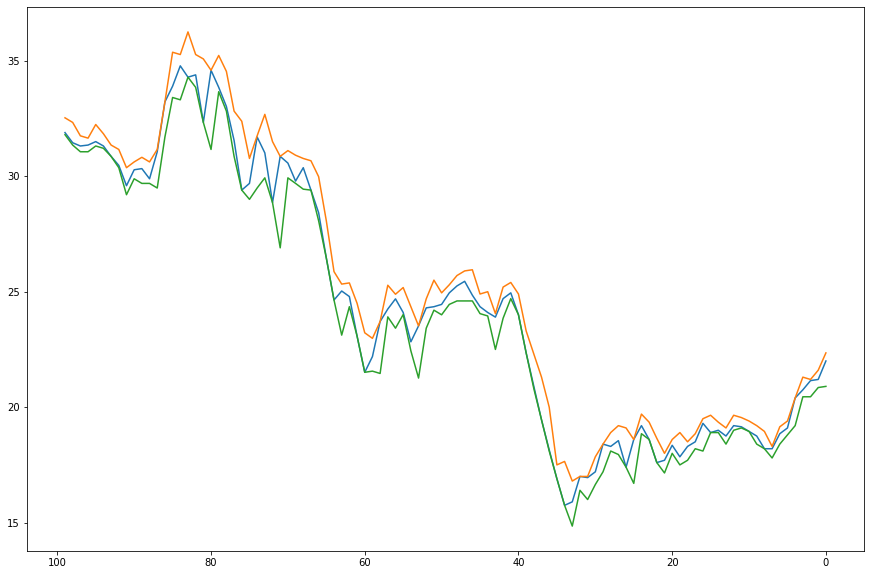

In [5]:
#import matplotlib as plt
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)

df['Close'].plot()
df['High'].plot()
df['Low'].plot().invert_xaxis()
#df['Close'].rolling(window=5).mean()
#plt.invert_xaxis()
plt.legend()

Thanh khoản

No handles with labels found to put in legend.


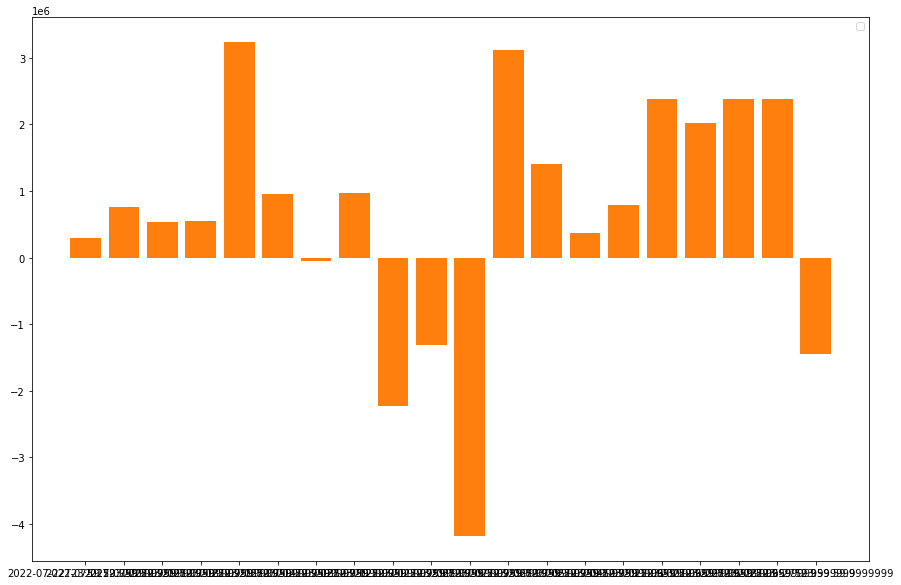

In [62]:
#df['Money'].plot()
g_df = df[0:20]
plt.bar(g_df['Date'],g_df['%'])
plt.bar(g_df['Date'],g_df['NN'])
plt.legend()
plt.show()

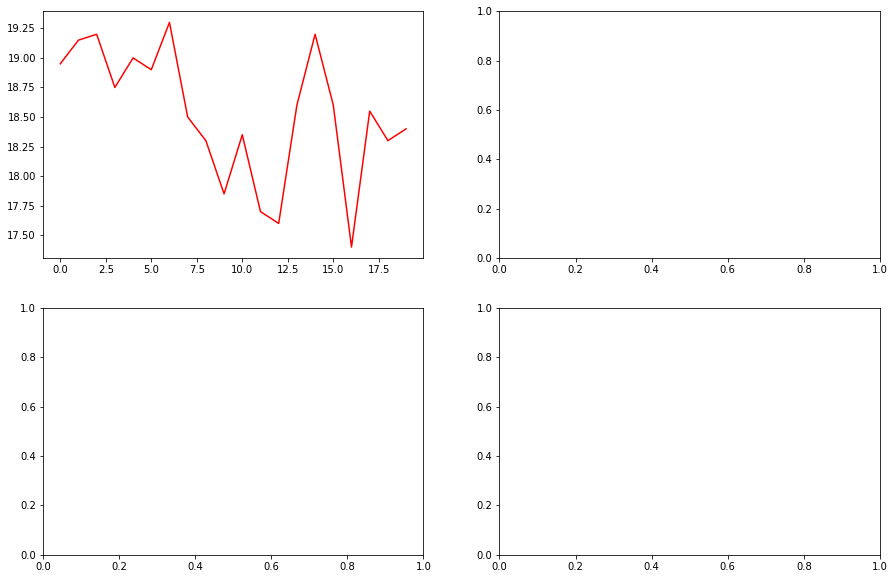

In [89]:
from tkinter import Y
import matplotlib.pyplot as plt
import numpy as np

# Set one size for all subplot

fig, ax = plt.subplots(2, 2, figsize=(15,10))

# Preparing the data to subplots

#x = np.linspace(0,1)
N = 20
x = np.arange(0,N,1)
y1 = df['Close'][0:N]
y2 = df['Volume'][0:N]
# y3 = x ** 6
# y4 = x ** 8

# Plot

ax[0, 0].plot(x, y1, color='r')
#ax[0, 0].plot(x, df['High'], color='b')
#ax[0, 0].plot(x, df['Low'], color='g')
#ax[0, 1].plot(x, y2, color='k', linestyle=':')

#Vẽ đồ thị thứ 2 (dạng bar)
#ax[0,1].bar(x, y1, color='b', label='ET')

#ax[1, 0].plot(x, y3, color='y', linestyle='-.')
#ax[1, 1].plot(x, y4, color='c',linestyle='--')

# Display

plt.show()


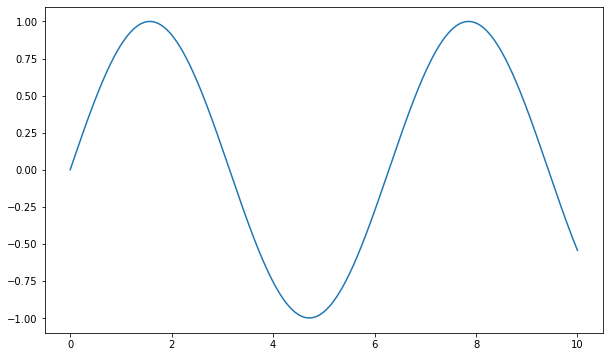

In [32]:
# Import Library

import matplotlib.pyplot as plt
import numpy as np

# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (10,6)

# Define Data

x = np.linspace(0, 10, 1000)
y = np.sin(x)

# Plot

plt.plot(x, y)

# Display

plt.show()

**KIỂM TRA DỮ LIÊU**

In [20]:
df.tail()['Date']
df['Date'][len(df)-1]

'2022-07-22T23:59:59.9999999'